In [1]:
from PIL import Image
import matplotlib.pyplot as plt 
import torch 
import numpy as np
import torchvision
import torch.nn as nn 
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

%matplotlib inline

In [2]:
trans = transforms.Compose([transforms.Resize((100, 100)),
                            transforms.ToTensor(),
                            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                            ])

trainset = torchvision.datasets.ImageFolder(root = 'D:\git_space\TIL\Deep-Learning\my_data\instrument', transform = trans)

In [3]:
trainset.__getitem__(10)

(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]),
 1)

In [4]:
len(trainset)

30

In [5]:
classes = trainset.classes
classes

['harp', 'piano', 'violin']

In [6]:
trainloader = DataLoader(trainset,
                        batch_size=16,
                        shuffle=False,
                        num_workers=4)

In [7]:
images, labels = next(iter(trainloader))
print(labels)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])


In [8]:
def imshow(img):
    img = img / 2 + 0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))

    print(np_img.shape)
    print((np.transpose(np_img, (1, 2, 0))).shape)

torch.Size([16, 3, 100, 100])
(3, 410, 410)
(410, 410, 3)
torch.Size([16, 3, 100, 100])
torch.Size([3, 206, 818])
 harp  harp  harp  harp  harp  harp  harp  harp  harp  harp piano piano piano piano piano piano 


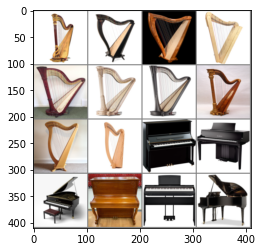

In [9]:
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=4))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print(''.join('%5s '%classes[labels[j]] for j in range(16)))

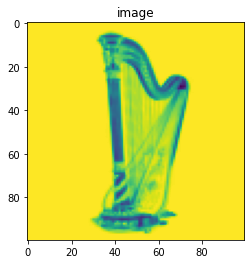

In [10]:
plt.title('image')
plt.imshow(images[0, 0, :, :])
plt.show()

In [11]:
layer = nn.Conv2d(3, 20, 15, 1).to(torch.device('cpu'))
layer

Conv2d(3, 20, kernel_size=(15, 15), stride=(1, 1))

In [12]:
output_data = layer(images)
output_data = output_data.data 
output = output_data.cpu().numpy()

In [13]:
output.shape

(16, 20, 86, 86)

In [14]:
weight = layer.weight
weight = weight.detach().numpy()

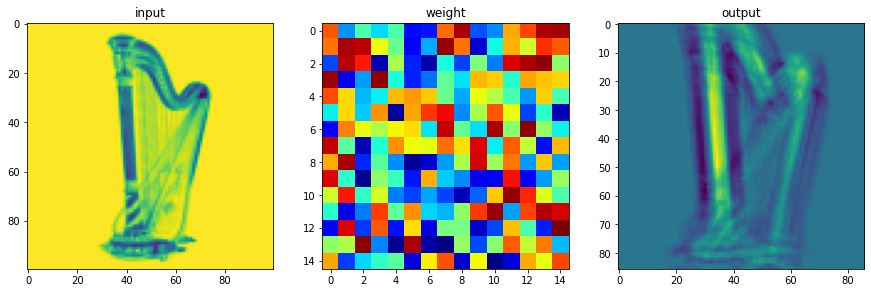

In [15]:
plt.figure(figsize=(15, 30))
plt.subplot(131)
plt.title('input')
plt.imshow(images[0, 0, :, :])
plt.subplot(132)
plt.title('weight')
plt.imshow(weight[0, 0, :, :], 'jet')
plt.subplot(133)
plt.title('output')
plt.imshow(output[0, 0, :, :])

In [16]:
output = torch.from_numpy(output)

In [17]:
pool = F.max_pool2d(output, 2, 2)
pool.shape

torch.Size([16, 20, 43, 43])

In [18]:
pool_arr = pool.numpy()

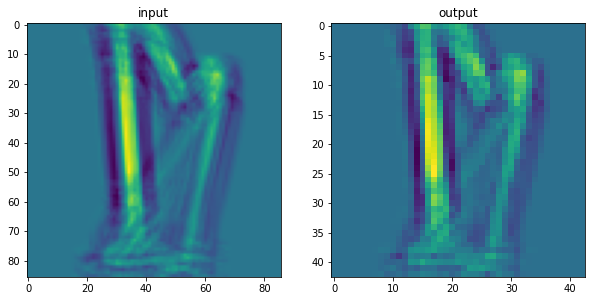

In [19]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.title('input')
plt.imshow(output[0, 0, :, :])
plt.subplot(122)
plt.title('output')
plt.imshow(pool_arr[0, 0, :, :])
plt.show()

In [20]:
pool_arr = torch.from_numpy(pool_arr)
pool_arr.shape

torch.Size([16, 20, 43, 43])

In [21]:
flatten = pool_arr.view(16, 20 * 43 * 43)
flatten.shape

torch.Size([16, 36980])

In [22]:
lin = nn.Linear(36980, 3)(flatten)
lin.shape

torch.Size([16, 3])

In [23]:
lin

tensor([[ 2.5878e-03, -2.3599e-02, -7.7970e-02],
        [ 2.4532e-01,  4.3933e-02, -1.2657e-01],
        [-1.8177e-01, -7.1308e-02,  2.6394e-01],
        [ 1.1718e-01,  1.6427e-02,  3.2972e-02],
        [ 2.3818e-01,  3.5542e-02,  1.5894e-01],
        [ 1.7074e-01,  8.0454e-04, -7.5148e-02],
        [ 2.7980e-01,  1.3528e-02, -1.0190e-01],
        [-7.7079e-02,  1.9653e-01, -2.1756e-01],
        [-3.3483e-02,  7.2247e-02, -2.3626e-02],
        [ 1.1709e-01, -1.3515e-01,  1.2258e-04],
        [-2.4670e-01, -1.5169e-02,  2.2122e-01],
        [-9.9749e-02, -5.3440e-02,  6.9598e-03],
        [-2.9493e-02,  3.0598e-01, -1.7753e-01],
        [-1.3813e-01, -5.7209e-04, -4.3559e-02],
        [ 7.6152e-02,  2.1814e-01, -3.6915e-01],
        [-8.5950e-02,  2.8914e-01, -4.8805e-01]], grad_fn=<AddmmBackward>)

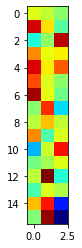

In [24]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.show()

In [25]:
with torch.no_grad():
    flatten = pool_arr.view(16, 20 * 43 * 43)
    lin = nn.Linear(36980, 3)(flatten)
    softmax = F.softmax(lin, dim=1)

In [26]:
softmax

tensor([[0.3749, 0.2607, 0.3644],
        [0.3213, 0.2804, 0.3983],
        [0.2341, 0.3617, 0.4042],
        [0.3424, 0.2742, 0.3834],
        [0.4041, 0.2773, 0.3186],
        [0.3650, 0.2750, 0.3600],
        [0.3518, 0.2892, 0.3590],
        [0.3516, 0.3027, 0.3457],
        [0.3298, 0.3125, 0.3578],
        [0.3368, 0.2905, 0.3727],
        [0.2294, 0.4088, 0.3618],
        [0.3808, 0.2550, 0.3642],
        [0.2834, 0.3408, 0.3758],
        [0.2967, 0.3668, 0.3365],
        [0.3477, 0.3018, 0.3504],
        [0.3887, 0.2621, 0.3493]])

In [27]:
np.mean(softmax.numpy()[:, 0])

0.33365375

In [28]:
np.mean(softmax.numpy()[:, 1])

0.30372334

In [29]:
np.mean(softmax.numpy()[:, 2])

0.36262292